In [1]:
import os
import sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../../../AutexysHost/source')
    
from utilities import DataLoggerUtility as dlu
from utilities import DataPlotterUtility as dpu
mplu = dpu.mplu
from utilities import FET_Modeling as fet_model
#from procedures import Device_History as DH

import numpy as np

1.5011536574363702e-11


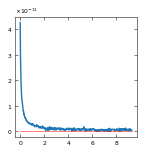

In [38]:
data = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/A/Pad3-3', 'RapidBias.json', minExperiment=1, maxExperiment=1)

x = data[0]['Results']['timestamps']
y = data[0]['Results']['ig_data']
i_start = 50
i_end = 450
x = x[i_start:i_end]
y = y[i_start:i_end]

start_time = x[0]
leakage = np.percentile(y, 1)
x = [v-start_time for v in x]
y = [v-leakage for v in y]
y = [v if(v > 0) else 0 for v in y]

fig, ax = dpu.makeBlankPlot(figsize=(2.2,2.2))
ax.plot(x,y)
ax.plot([x[0],x[-1]], [0,0], color='red', lw=0.5)

charge = 0
for i in range(len(x)-1):
    t = x[i+1] - x[i] 
    charge += t*y[i]
print(charge)

[PLOT]: Plotting SubthresholdCurve plot.
[PLOT]: Finished plotting SubthresholdCurve plot.
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.785 s)
[177.49043576 189.20663647 221.92659375 213.87704274 234.95945014
 281.90554443 377.57871515]
2RC = 69.8 kΩ µm
Rsh = 23.2 kΩ
[201.88216422 221.38084663 263.40926251 251.24738584 274.13076012
 327.36922657 445.18688209]
2RC = 78.0 kΩ µm
Rsh = 27.7 kΩ
[252.1476351  282.67645819 341.08140726 321.96592157 345.37574853
 407.893114   573.64518891]
2RC = 97.2 kΩ µm
Rsh = 35.5 kΩ
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.729 s)


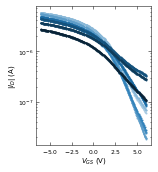

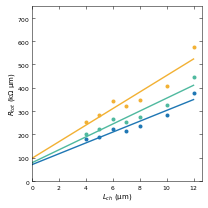

In [40]:
data_4um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-4um', 'GateSweep.json', minExperiment=3, maxExperiment=3, maxRelativeIndex=2)
data_5um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-5um', 'GateSweep.json', minExperiment=3, maxExperiment=3, maxRelativeIndex=2)
data_6um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-6um', 'GateSweep.json', minExperiment=3, maxExperiment=3, maxRelativeIndex=2)
data_7um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-7um', 'GateSweep.json', minExperiment=3, maxExperiment=3, maxRelativeIndex=2)
data_8um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-8um', 'GateSweep.json', minExperiment=3, maxExperiment=3, maxRelativeIndex=2)
data_10um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-10um', 'GateSweep.json', minExperiment=3, maxExperiment=3, maxRelativeIndex=2)
data_12um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-12um', 'GateSweep.json', minExperiment=3, maxExperiment=3, maxRelativeIndex=2)
data_all = [*data_4um, *data_5um, *data_6um, *data_7um, *data_8um, *data_10um, *data_12um]

fig1, (ax1,) = dpu.makeDevicePlot('SubthresholdCurve', data_all, data_4um[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(2.3,2.5)})

def resistance_from_gate_sweep(data, vds, vgs, sweep_direction='reverse', verbose=False):
    iv = [(d['Results']['id_data'][i],d['Results']['gateVoltages'][i]) for d in data for i in range(len(d['Results']['id_data'])) if((sweep_direction == 'both') or (i%2 == (1 if(sweep_direction == 'reverse') else 0)))]
    vi = {v_gs:[i_d for id_data,vgs_data in iv for i_d,v__gs in zip(id_data,vgs_data) if (v_gs == v__gs)] for id_data,vgs_data in iv for v_gs in vgs_data}
    vi = {v_gs:i for v_gs,i in vi.items() if (v_gs in vgs)}
    print(vi) if(verbose) else None
    r = {v_gs:[vds/i_d for i_d in i] for v_gs,i in vi.items()}
    print(r) if(verbose) else None
    return {'raw':r, 'mean':{v:np.mean(res) for v,res in r.items()}, 'std':{v:np.std(res) for v,res in r.items()}}

vds = -0.1
vgs = [-6, -4.0606060606060606, -2]
Wch = 10
sweep_direction = 'reverse'

r_4um = resistance_from_gate_sweep(data_4um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_5um = resistance_from_gate_sweep(data_5um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_6um = resistance_from_gate_sweep(data_6um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_7um = resistance_from_gate_sweep(data_7um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_8um = resistance_from_gate_sweep(data_8um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_10um = resistance_from_gate_sweep(data_10um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_12um = resistance_from_gate_sweep(data_12um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)

x = [4,5,6,7,8,10,12]
TLM_Lines = [[r_4um['mean'][v],r_5um['mean'][v],r_6um['mean'][v],r_7um['mean'][v],r_8um['mean'][v],r_10um['mean'][v],r_12um['mean'][v]] for v in vgs]
TLM_Variance = [[r_4um['std'][v],r_5um['std'][v],r_6um['std'][v],r_7um['std'][v],r_8um['std'][v],r_10um['std'][v],r_12um['std'][v]] for v in vgs]
colors = ['#1f77b4', '#4FB99F', '#f2b134']

fig2, (ax2) = dpu.makeBlankPlot(figsize=(3,3))
for index,l in enumerate(TLM_Lines):
    y = np.array(l)*Wch/1000
    print(y)
    ax2.plot(x, y, marker='o', ms=4, lw=0, color=colors[index] if(index < len(colors)) else None)
    slope, intercept = np.polyfit(x, y, 1)
    TLM_fit_function = lambda l_ch: slope*l_ch+intercept
    ax2.plot([0, max(x)], [TLM_fit_function(0), TLM_fit_function(max(x))], color=colors[index] if(index < len(colors)) else None)
    print(f'2RC = {round(intercept, 1)} kΩ µm')
    print(f'Rsh = {round(slope, 1)} kΩ')
    
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0, top=ax2.get_ylim()[1]*1.25)
ax2.set_ylabel('$R_{tot}$ (kΩ µm)')
ax2.set_xlabel('$L_{ch}$ (µm)')

dpu.saveExternalPlot(fig2, 'TLM-from-gate-sweep')


[PLOT]: Plotting OutputCurve plot.
[PLOT]: Finished plotting OutputCurve plot.
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.782 s)
[192.46017999 206.32084542 243.58755755 230.49547307 252.60690324
 305.39759713 402.26232331]
2RC = 81.1 kΩ µm
Rsh = 24.3 kΩ
[204.33976799 220.1164416  260.26484551 245.75942119 268.93432086
 323.75346821 427.29016848]
2RC = 87.6 kΩ µm
Rsh = 25.7 kΩ
[222.65417131 240.14850784 286.75479597 268.38504666 292.24043205
 349.11325234 463.52520187]
2RC = 98.9 kΩ µm
Rsh = 27.5 kΩ
[251.90058995 272.80068091 327.42548614 303.05693531 328.80784141
 387.85095663 520.52156261]
2RC = 117.4 kΩ µm
Rsh = 30.2 kΩ
[301.72010633 328.96468235 396.00510055 360.01137636 386.92203521
 449.85064958 613.26366658]
2RC = 151.8 kΩ µm
Rsh = 34.1 kΩ
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.536 s)


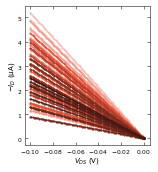

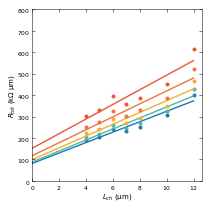

In [36]:
data_4um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-4um', 'DrainSweep.json', minExperiment=4, maxExperiment=4)
data_5um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-5um', 'DrainSweep.json', minExperiment=4, maxExperiment=4)
data_6um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-6um', 'DrainSweep.json', minExperiment=4, maxExperiment=4)
data_7um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-7um', 'DrainSweep.json', minExperiment=4, maxExperiment=4)
data_8um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-8um', 'DrainSweep.json', minExperiment=4, maxExperiment=4)
data_10um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-10um', 'DrainSweep.json', minExperiment=4, maxExperiment=4)
data_12um = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/B/5,2-12um', 'DrainSweep.json', minExperiment=4, maxExperiment=4)
data_all = [*data_4um, *data_5um, *data_6um, *data_7um, *data_8um, *data_10um, *data_12um]

fig1, (ax1,) = dpu.makeDevicePlot('OutputCurve', data_all, data_4um[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2.3,2.5)})

def resistance_from_drain_sweep(data, vds, vgs, sweep_direction='reverse', verbose=False):
    iv = [(d['Results']['id_data'][i],d['Results']['drainVoltages'][i],d['runConfigs']['AutoDrainSweep']['gateVoltageSetPoints'][j]) for j,d in enumerate(data) for i in range(len(d['Results']['id_data'])) if((sweep_direction == 'both') or (i%2 == (1 if(sweep_direction == 'reverse') else 0)))]
    vi = {v_ds:[(i_d,v_gs) for id_data,vds_data,v_gs in iv for i_d,v__ds in zip(id_data,vds_data) if (v_ds == v__ds)] for id_data,vds_data,v_gs in iv for v_ds in vds_data}
    vi = vi[vds]
    print(vi) if(verbose) else None
    r = {v_gs:vds/i_d for i_d,v_gs in vi}
    print(r) if(verbose) else None
    return r

vds = -0.1
vgs = [-6,-5,-4,-3,-2]
Wch = 10
sweep_direction = 'forward'

r_4um = resistance_from_drain_sweep(data_4um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_5um = resistance_from_drain_sweep(data_5um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_6um = resistance_from_drain_sweep(data_6um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_7um = resistance_from_drain_sweep(data_7um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_8um = resistance_from_drain_sweep(data_8um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_10um = resistance_from_drain_sweep(data_10um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)
r_12um = resistance_from_drain_sweep(data_12um, vds=vds, vgs=vgs, sweep_direction=sweep_direction)

x = [4,5,6,7,8,10,12]
TLM_Lines = [[r_4um[v],r_5um[v],r_6um[v],r_7um[v],r_8um[v],r_10um[v],r_12um[v]] for v in vgs]
colors = ['#1f77b4', '#4FB99F', '#f2b134', '#ee7539', '#ed553b']

fig2, (ax2) = dpu.makeBlankPlot(figsize=(3,3))
for index,l in enumerate(TLM_Lines):
    y = np.array(l)*Wch/1000
    print(y)
    ax2.plot(x, y, marker='o', ms=4, lw=0, color=colors[index] if(index < len(colors)) else None)
    slope, intercept = np.polyfit(x, y, 1)
    TLM_fit_function = lambda l_ch: slope*l_ch+intercept
    ax2.plot([0, max(x)], [TLM_fit_function(0), TLM_fit_function(max(x))], color=colors[index] if(index < len(colors)) else None)
    print(f'2RC = {round(intercept, 1)} kΩ µm')
    print(f'Rsh = {round(slope, 1)} kΩ')

ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0, top=ax2.get_ylim()[1]*1.25)
ax2.set_ylabel('$R_{tot}$ (kΩ µm)')
ax2.set_xlabel('$L_{ch}$ (µm)')

dpu.saveExternalPlot(fig2, 'TLM-from-drain-sweep')


[PLOT]: Plotting SubthresholdCurve plot.
[PLOT]: Finished plotting SubthresholdCurve plot.
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.774 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.482 s)


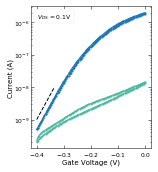

In [25]:
data = dlu.loadSpecificDeviceHistory('../../AutexysData/Brendan/MoS2FET/B2/H/51-63', 'GateSweep.json', minExperiment=56, maxExperiment=56, minRelativeIndex=1, maxRelativeIndex=1)

fig1, (ax1,) = dpu.makeDevicePlot('SubthresholdCurve', data, data[0]['Identifiers'], mode_parameters={'enableLegend':True, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2.3,2.5)})

x, y, pointsPerX = mplu.extractSweep(ax1, data[0], direction='both', x_data='gate voltage', y_data='gate current')
for x_set, y_set in zip(x,y):
    ax1.plot(x_set, y_set, color='#4FB99F', marker='o', markersize=2, linewidth=1)

ax1.plot([-0.4, -0.335], [1e-9, 1e-8], color='black', linewidth=1, ls='--')
    
    
ax1.set_ylabel('Current (A)')
ax1.set_xlabel('Gate Voltage (V)')

dpu.saveExternalPlot(fig1, 'MoS2-on-quartz')

[PLOT]: Plotting OutputCurve plot.
[PLOT]: Finished plotting OutputCurve plot.
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.692 s)


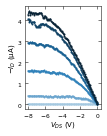

In [2]:
dataE10 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,15-TR,BR', 'DrainSweep.json', minExperiment=12, maxExperiment=12) #Lch = 8 µm

fig1, (ax1,) = dpu.makeDevicePlot('OutputCurve', dataE10, dataE10[0]['Identifiers'], mode_parameters={'enableLegend':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0), 'xticks':[0,-2,-4,-6,-8], 'colorsOverride':('white_blue_black',0.8,0.15)})



In [58]:
print('Data for DRC 2023')

# Bottom contacts
dataB1 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/4-20', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 1 µm
dataB2 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/6-20', 'GateSweep.json', minExperiment=17, maxExperiment=17, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 1 µm
dataB3 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,20-TL,BL', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 1 µm
dataB4 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,20-TL,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 2 µm
dataB5 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,20-TR,BR', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 4 µm
dataB6 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/14-20', 'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 8 µm
dataB7 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/16-20', 'GateSweep.json', minExperiment=14, maxExperiment=14, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
dataB8 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,20-TL,BL', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 2 µm
dataB9 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,20-TL,BR', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 4 µm
dataB10 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,20-TR,BR', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
data_bottom_contacts = [dataB1, dataB2, dataB3, dataB4, dataB5, dataB6, dataB7, dataB8, dataB9, dataB10]

# Top contacts
dataT1 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/4-17', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 1 µm
dataT2 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/6-17', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 1 µm
#dataT3 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,17-TL,BL', 'GateSweep.json', minExperiment=0, maxExperiment=0, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 1 µm
#dataT4 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,17-TL,BR', 'GateSweep.json', minExperiment=0, maxExperiment=0, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 2 µm
#dataT5 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,17-TR,BR', 'GateSweep.json', minExperiment=0, maxExperiment=0, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 4 µm
dataT6 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/14-17', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 8 µm
dataT7 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/16-17', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 8 µm
dataT8 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,17-TL,BL', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 2 µm
dataT9 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,17-TL,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 4 µm
dataT10 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,17-TR,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
data_top_contacts = [dataT1, dataT2, dataT6, dataT7, dataT8, dataT9, dataT10]

# Edge contacts
dataE1 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/4-15', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 1 µm
dataE2 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/6-15', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 1 µm
dataE3 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,15-TL,BL', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 1 µm
dataE4 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,15-TL,BR', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 2 µm
dataE5 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,15-TR,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 4 µm
dataE6 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/14-15', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 8 µm
dataE7 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/16-15', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
dataE8 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,15-TL,BL', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 2 µm
dataE9 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,15-TL,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 4 µm
dataE10 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,15-TR,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
data_edge_contacts = [dataE1, dataE2, dataE3, dataE4, dataE5, dataE6, dataE7, dataE8, dataE9, dataE10]

# !!! Width-normalize all data !!!
for data in data_bottom_contacts+data_top_contacts+data_edge_contacts:
    data['Results']['id_data'] = np.array(data['Results']['id_data'])/10

#fig1, (ax1,) = dpu.makeDevicePlot('SubthresholdCurve', data_bottom_contacts, dataB1['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0), 'xticks':[-15,0,15]})
#fig2, (ax2,) = dpu.makeDevicePlot('SubthresholdCurve', data_top_contacts, dataT1['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0), 'xticks':[-15,0,15]})
fig3, (ax3,) = dpu.makeDevicePlot('SubthresholdCurve', data_edge_contacts, dataB1['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0), 'xticks':[-15,0,15], 'ylim':[1e-14,1e-5]})
ax3.set_ylabel('|$I_{{D}}$| (A/µm)')
dpu.saveExternalPlot(fig3, 'CNT_subthreshold_E-contacts_JR1B', mode_parameters={'publication_mode':True})


fig4, (ax4,) = dpu.makeDevicePlot('SubthresholdCurve', [dataB6, dataT6, dataE6], dataB1['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0), 'colorsOverride':['#be442f','#ee7539','#1f77b4'], 'legendLabels':['bottom','top','edge'], 'ylim':[1e-14,1e-6]})
lines, labels = ax4.get_legend_handles_labels()
ax4.legend(lines, ['bottom','top','edge'], title='Contacts', loc='lower left', labelspacing=(0.3))
ax4.set_ylabel('|$I_{{D}}$| (A/µm)')
ax4.set_xticks([-15,0,15])
#print([mplu.matplotlib.colors.rgb2hex(c) for c in mplu.setupColors(fig4, 10, colorDefault=[], colorMapName='white_red_black', colorMapStart=0.9, colorMapEnd=0.15)])
dpu.saveExternalPlot(fig4, 'CNT_subthreshold_BTE-contacts_JR1B', mode_parameters={'publication_mode':True})



Data for DRC 2023
[PLOT]: Plotting SubthresholdCurve plot.
[PLOT]: Finished plotting SubthresholdCurve plot.


/Users/jaydoherty/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.784 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.724 s)
[PLOT]: Plotting SubthresholdCurve plot.
[PLOT]: Finished plotting SubthresholdCurve plot.
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.866 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.743 s)


In [12]:
print('Data for DRC 2023 Abstract')

# Bottom contacts
dataB1 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/4-20', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 1 µm
dataB2 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/6-20', 'GateSweep.json', minExperiment=17, maxExperiment=17, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 1 µm
dataB3 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,20-TL,BL', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 1 µm
dataB4 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,20-TL,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 2 µm
dataB5 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,20-TR,BR', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 4 µm
dataB6 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/14-20', 'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 8 µm
dataB7 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/16-20', 'GateSweep.json', minExperiment=14, maxExperiment=14, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
dataB8 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,20-TL,BL', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 2 µm
dataB9 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,20-TL,BR', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 4 µm
dataB10 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,20-TR,BR', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
data_bottom_contacts = [dataB1, dataB2, dataB3, dataB4, dataB5, dataB6, dataB7, dataB8, dataB9, dataB10]

# Top contacts
dataT1 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/4-17', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 1 µm
dataT2 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/6-17', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 1 µm
#dataT3 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,17-TL,BL', 'GateSweep.json', minExperiment=0, maxExperiment=0, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 1 µm
#dataT4 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,17-TL,BR', 'GateSweep.json', minExperiment=0, maxExperiment=0, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 2 µm
#dataT5 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,17-TR,BR', 'GateSweep.json', minExperiment=0, maxExperiment=0, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 4 µm
dataT6 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/14-17', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 8 µm
dataT7 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/16-17', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 8 µm
dataT8 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,17-TL,BL', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 2 µm
dataT9 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,17-TL,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 4 µm
dataT10 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,17-TR,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
data_top_contacts = [dataT1, dataT2, dataT6, dataT7, dataT8, dataT9, dataT10]

# Edge contacts
dataE1 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/4-15', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 1 µm
dataE2 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/6-15', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 1 µm
dataE3 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,15-TL,BL', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 1 µm
dataE4 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,15-TL,BR', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 2 µm
dataE5 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/8,15-TR,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 4 µm
dataE6 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/14-15', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 8 µm
dataE7 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/16-15', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
dataE8 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,15-TL,BL', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)[0] #Lch = 2 µm
dataE9 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,15-TL,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=2, maxRelativeIndex=2)[0] #Lch = 4 µm
dataE10 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/B/18,15-TR,BR', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=3, maxRelativeIndex=3)[0] #Lch = 8 µm
data_edge_contacts = [dataE1, dataE2, dataE3, dataE4, dataE5, dataE6, dataE7, dataE8, dataE9, dataE10]

def extract_ion(data, sweep_direction='reverse'):
    values = data['Results']['id_data']
    if(sweep_direction == 'forward'):
        values = values[0]
    elif(sweep_direction == 'reverse'):
        values = values[1]
    elif(sweep_direction == 'both'):
        values = values[0] + values[1]
    return np.percentile(np.abs(values), 99)

# Get Ion and Ron
ion_bottom_contacts = [extract_ion(d) for d in data_bottom_contacts]
ion_top_contacts = [extract_ion(d) for d in data_top_contacts]
ion_edge_contacts = [extract_ion(d) for d in data_edge_contacts]
Rw_bottom_contact = [10*abs(0.5/i) for i in ion_bottom_contacts]
Rw_top_contacts = [10*abs(0.5/i) for i in ion_top_contacts]
Rw_edge_contacts = [10*abs(0.5/i) for i in ion_edge_contacts]

#fig1, (ax1,) = dpu.makeDevicePlot('TransferCurve', data_bottom_contacts, dataB1['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
#fig2, (ax2,) = dpu.makeDevicePlot('TransferCurve', data_top_contacts, dataB1['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
#fig3, (ax2,) = dpu.makeDevicePlot('TransferCurve', data_edge_contacts, dataB1['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})

# Sort by channel length
ibc = ion_bottom_contacts
itc = ion_top_contacts
iec = ion_edge_contacts
rbc = Rw_bottom_contact
rtc = Rw_top_contacts
rec = Rw_edge_contacts
Lch_vs_ion_bottom_contacts = {1:[ibc[0],ibc[1],ibc[2]], 2:[ibc[3],ibc[7]], 4:[ibc[4],ibc[8]], 8:[ibc[5],ibc[6],ibc[9]]}
Lch_vs_ion_top_contacts = {1:[itc[0],itc[1]], 2:[itc[4]], 4:[itc[5]], 8:[itc[2],itc[3],itc[6]]}
Lch_vs_ion_edge_contacts = {1:[iec[0],iec[1],iec[2]], 2:[iec[3],iec[7]], 4:[iec[4],iec[8]], 8:[iec[5],iec[6],iec[9]]}
Lch_vs_Rw_bottom_contacts = {1:[rbc[0],rbc[1],rbc[2]], 2:[rbc[3],rbc[7]], 4:[rbc[4],rbc[8]], 8:[rbc[5],rbc[6],rbc[9]]}
Lch_vs_Rw_top_contacts = {1:[rtc[0],rtc[1]], 2:[rtc[4]], 4:[rtc[5]], 8:[rtc[2],rtc[3],rtc[6]]}
Lch_vs_Rw_edge_contacts = {1:[rec[0],rec[1],rec[2]], 2:[rec[3],rec[7]], 4:[rec[4],rec[8]], 8:[rec[5],rec[6],rec[9]]}

# Fig 1 - Lch vs Ion
fig1, (ax1) = dpu.makeBlankPlot(figsize=(2,2))

for L,ions in Lch_vs_ion_bottom_contacts.items():
    for i in ions:
        l1 = ax1.plot([L],[i], color='#be442f', marker='o', ms='6', lw=0)[0]
for L,ions in Lch_vs_ion_top_contacts.items():
    for i in ions:
        l2 = ax1.plot([L],[i], color='#ee7539', marker='o', ms='6', lw=0)[0]
for L,ions in Lch_vs_ion_edge_contacts.items():
    for i in ions:
        l3 = ax1.plot([L],[i], color='#1f77b4', marker='o', ms='6', lw=0)[0]

ax1.set_xlim([0,9])
ax1.set_xticks([0,1,2,4,6,8])
ax1.set_xlabel('$L_{ch}$ (µm)')
ax1.set_ylabel('$I_{on}$ (A)')
ax1.legend([l1,l2,l3], ['bottom','top','edge'], title='Contacts', loc='center', labelspacing=(0.3))
fig1.tight_layout()
dpu.saveExternalPlot(fig1, 'CNT_ion_BTE-contacts_JR1B', mode_parameters={'publication_mode':True})

# Fig 2 - Lch vs Ron
fig2, (ax2) = dpu.makeBlankPlot(figsize=(2,1.5))
ax2.plot([0,10], [0.1, 0.1], color='black', ls='--', lw=0.5)

for L,Rs in Lch_vs_Rw_bottom_contacts.items():
    for R in Rs:
        ax2.plot([L],[R/1e6], color='#be442f', marker='o', ms='6', lw=0)
for L,Rs in Lch_vs_Rw_top_contacts.items():
    for R in Rs:
        ax2.plot([L],[R/1e6], color='#ee7539', marker='o', ms='6', lw=0)
for L,Rs in Lch_vs_Rw_edge_contacts.items():
    for R in Rs:
        ax2.plot([L],[R/1e6], color='#1f77b4', marker='o', ms='6', lw=0)
        
ax2.set_ylim([0,11])
ax2.set_yticks([0,2,4,6,8,10])
ax2.set_xlim([0,9])
ax2.set_xticks([0,1,2,4,6,8])
ax2.set_xlabel('$L_{ch}$ (µm)')
ax2.set_ylabel('$R_{on}$ (MΩ µm)')
fig2.tight_layout()
dpu.saveExternalPlot(fig2, 'CNT_Rw_BTE-contacts_JR1B', mode_parameters={'publication_mode':True})

# Fig 3 -- extension of Fig 2
fig3, (ax3) = dpu.makeBlankPlot(figsize=(2,1))
for L,Rs in Lch_vs_Rw_bottom_contacts.items():
    for R in Rs:
        ax3.plot([L],[R/1e6], color='#be442f', marker='o', ms='6', lw=0)
for L,Rs in Lch_vs_Rw_top_contacts.items():
    for R in Rs:
        ax3.plot([L],[R/1e6], color='#ee7539', marker='o', ms='6', lw=0)
for L,Rs in Lch_vs_Rw_edge_contacts.items():
    for R in Rs:
        ax3.plot([L],[R/1e6], color='#1f77b4', marker='o', ms='6', lw=0)

ax3.set_ylim([11,65])
ax3.set_yticks([20,40,60])
ax3.set_xlim([0,9])
ax3.set_xticks([0,1,2,4,6,8])
ax3.set_xlabel('$L_{ch}$ (µm)')
ax3.set_ylabel('$R_{on}$ (MΩ µm)')
fig3.tight_layout()
dpu.saveExternalPlot(fig3, 'CNT_Rw-outliers_BTE-contacts_JR1B', mode_parameters={'publication_mode':True})

# Fig 4 - Contact Type vs. Variation
Lch_vs_Rw_varitation_bottom_contacts = {k:(np.std(v)) for k,v in Lch_vs_Rw_bottom_contacts.items()}
Lch_vs_Rw_varitation_top_contacts = {k:(np.std(v)) for k,v in Lch_vs_Rw_top_contacts.items()}
Lch_vs_Rw_varitation_edge_contacts = {k:(np.std(v)) for k,v in Lch_vs_Rw_edge_contacts.items()}
Max_Rw_variation_bottom_contacts = Lch_vs_Rw_varitation_bottom_contacts[8]
Max_Rw_variation_top_contacts = Lch_vs_Rw_varitation_top_contacts[8]
Max_Rw_variation_edge_contacts = Lch_vs_Rw_varitation_edge_contacts[8]

print(f'BOTTOM VARIATION: {Max_Rw_variation_bottom_contacts}')
print(f'TOP VARIATION: {Max_Rw_variation_top_contacts}')
print(f'EDGE VARIATION: {Max_Rw_variation_edge_contacts}')

fig4, (ax4) = dpu.makeBlankPlot(figsize=(1.25,1.925))

ax4.bar(0,Max_Rw_variation_bottom_contacts/1e6, color='#be442f', width=0.5)
ax4.bar(0.75,Max_Rw_variation_top_contacts/1e6, color='#ee7539', width=0.5)
ax4.bar(1.5,Max_Rw_variation_edge_contacts/1e6, color='#1f77b4', width=0.5)

ax4.set_xticks([0,0.75,1.5])
ax4.set_xticklabels(['bottom', 'top', 'edge'])
ax4.set_ylabel('Variation in $R_{on}$ (MΩ µm)')
ax4.set_xlabel('Contact Type')
ax4.tick_params('x', length=0, width=1, which='major')
fig4.tight_layout()
dpu.saveExternalPlot(fig4, 'CNT_Rw-variation_BTE-contacts_JR1B', mode_parameters={'publication_mode':True})


Data for DRC 2023


/Users/jaydoherty/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.603 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.503 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.503 s)
BOTTOM VARIATION: 12355513.432530066
TOP VARIATION: 1061331.47062792
EDGE VARIATION: 1877427.3252111794
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.363 s)


In [13]:
print('Data for DRC 2023 Poster')

# --- Singleton Devices ---
# Bottom contacts
dataPD3 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD4 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD5 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD6 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD1to6 = [None, None, dataPD3, dataPD4, dataPD5, dataPD6]

# Edge contacts
dataPD7 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD9 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-9', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD10 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-10', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-11', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD12 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-12', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD7to12 = [dataPD7, None, dataPD9, dataPD10, dataPD11, dataPD12]

# Top contacts
dataPD13 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-13', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD14 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-14', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD15 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-15', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD16 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-16', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD17 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-17', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD18 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/device-18', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPD13to18 = [dataPD13, dataPD14, dataPD15, dataPD16, dataPD17, dataPD18]

#figA1, (axA1,) = dpu.makeDevicePlot('SubthresholdCurve', [d for d in dataPD1to6 if(d)], dataPD6['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
#dpu.saveExternalPlot(figA1, 'CNT_Bottom', mode_parameters={'publication_mode':True})
#figA2, (axA2,) = dpu.makeDevicePlot('SubthresholdCurve', [d for d in dataPD7to12 if(d)], dataPD12['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
#dpu.saveExternalPlot(figA2, 'CNT_Edge', mode_parameters={'publication_mode':True})
#figA3, (axA3,) = dpu.makeDevicePlot('SubthresholdCurve', [d for d in dataPD13to18 if(d)], dataPD18['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
#dpu.saveExternalPlot(figA3, 'CNT_Top', mode_parameters={'publication_mode':True})

# --- Quad Devices ---
# Bottom contacts
dataP19L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/19-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP19C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/19-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP19R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/19-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP20L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/20-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP20C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/20-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP20R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/20-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP21L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/21-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP21C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/21-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP21R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/21-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP19 = [dataP19L, dataP19C, dataP19R]
dataP20 = [dataP20L, dataP20C, dataP20R]
dataP21 = [dataP21L, dataP21C, dataP21R]

# Edge contacts
dataP22L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/22-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP22C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/22-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP22R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/22-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP23L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/23-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP23C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/23-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP23R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/23-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP24L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/24-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP24C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/24-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP24R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/24-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP22 = [dataP22L, dataP22C, dataP22R]
dataP23 = [dataP23L, dataP23C, dataP23R]
dataP24 = [dataP24L, dataP24C, dataP24R]

#figB1, (axB1,) = dpu.makeDevicePlot('SubthresholdCurve', [*dataP19, *dataP20, *dataP21], dataP19[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
#dpu.saveExternalPlot(figB1, 'CNT_Bottom', mode_parameters={'publication_mode':True})
#figB2, (axB2,) = dpu.makeDevicePlot('SubthresholdCurve', [*dataP22, *dataP23, *dataP24], dataP22[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
#dpu.saveExternalPlot(figB2, 'CNT_Edge', mode_parameters={'publication_mode':True})

# --- Large Devices ---
# Bottom contacts
dataP28L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/28-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP28C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/28-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP28R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/28-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP29L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/29-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP29C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/29-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP29R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/29-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP301 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/30-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP302 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/30-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP303 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/30-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP304 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/30-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP305 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/30-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP306 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/30-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP307 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/30-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP28 = [dataP28L, dataP28C, dataP28R]
dataP29 = [dataP29L, dataP29C, dataP29R]
dataP30 = [dataP301, dataP302, dataP303, dataP304, dataP305, dataP306, dataP307]

# Edge contacts
dataP31L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/31-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP31C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/31-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP31R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/31-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP32L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/32-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP32C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/32-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP32R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/32-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP331 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/33-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP332 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/33-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP333 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/33-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP334 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/33-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP335 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/33-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP336 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/33-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP337 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/33-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP31 = [dataP31L, dataP31C, dataP31R]
dataP32 = [dataP32L, dataP32C, dataP32R]
dataP33 = [dataP331, dataP332, dataP333, dataP334, dataP335, dataP336, dataP337]

# Top contacts
dataP34L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/34-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP34C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/34-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP34R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/34-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP35L = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/35-Left', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP35C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/35-Center', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP35R = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/35-Right', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP361 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/36-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP362 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/36-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP363 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/36-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP364 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/36-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP365 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/36-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP366 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/36-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP367 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/36-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataP34 = [dataP34L, dataP34C, dataP34R]
dataP35 = [dataP35L, dataP35C, dataP35R]
dataP36 = [dataP361, dataP362, dataP363, dataP364, dataP365, dataP366, dataP367]

figC1, (axC1,) = dpu.makeDevicePlot('SubthresholdCurve', [*dataP28, *dataP29, *dataP30], data_bottom_contacts[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
dpu.saveExternalPlot(figC1, 'CNT_Bottom', mode_parameters={'publication_mode':True})
figC2, (axC2,) = dpu.makeDevicePlot('SubthresholdCurve', [*dataP31, *dataP32, *dataP33], data_edge_contacts[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
dpu.saveExternalPlot(figC2, 'CNT_Edge', mode_parameters={'publication_mode':True})
figC3, (axC3,) = dpu.makeDevicePlot('SubthresholdCurve', [*dataP34, *dataP35, *dataP36], data_top_contacts[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'reverse', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
dpu.saveExternalPlot(figC3, 'CNT_Top', mode_parameters={'publication_mode':True})

# --- TLM Devices ---
# Bottom contacts
dataPTLM11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM1-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM12 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM1-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM13 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM1-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM14 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM1-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM15 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM1-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM16 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM1-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM17 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM1-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM1 = [dataPTLM11, dataPTLM12, dataPTLM13, dataPTLM14, dataPTLM15, dataPTLM16, dataPTLM17]

dataPTLM21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM2-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM22 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM2-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM23 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM2-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM24 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM2-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM2-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM26 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM2-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM27 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM2-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM2 = [dataPTLM21, dataPTLM22, dataPTLM23, dataPTLM24, dataPTLM25, dataPTLM26, dataPTLM27]

dataPTLM31 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM3-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM32 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM3-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM33 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM3-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM34 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM3-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM3-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM36 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM3-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM37 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM3-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM3 = [dataPTLM31, dataPTLM32, dataPTLM33, dataPTLM34, dataPTLM35, dataPTLM36, dataPTLM37]

# Edge contacts
dataPTLM51 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM5-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM52 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM5-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM53 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM5-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM54 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM5-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM55 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM5-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM56 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM5-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM57 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM5-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM5 = [dataPTLM51, dataPTLM52, dataPTLM53, dataPTLM54, dataPTLM55, dataPTLM56, dataPTLM57]

dataPTLM61 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM6-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM62 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM6-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM63 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM6-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM64 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM6-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM65 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM6-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM66 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM6-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM67 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM6-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM6 = [dataPTLM61, dataPTLM62, dataPTLM63, dataPTLM64, dataPTLM65, dataPTLM66, dataPTLM67]

dataPTLM71 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM7-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM72 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM7-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM73 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM7-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM74 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM7-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM75 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM7-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM76 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM7-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM77 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM7-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM7 = [dataPTLM71, dataPTLM72, dataPTLM73, dataPTLM74, dataPTLM75, dataPTLM76, dataPTLM77]

# Top contacts
dataPTLM91 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM9-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM92 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM9-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM93 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM9-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM94 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM9-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM95 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM9-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM96 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM9-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM97 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM9-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM9 = [dataPTLM91, dataPTLM92, dataPTLM93, dataPTLM94, dataPTLM95, dataPTLM96, dataPTLM97]

dataPTLM101 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM10-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM102 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM10-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM103 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM10-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM104 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM10-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM105 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM10-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM106 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM10-6', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM107 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/TLM10-7', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPTLM10 = [dataPTLM101, dataPTLM102, dataPTLM103, dataPTLM104, dataPTLM105, dataPTLM106, dataPTLM107]

# --- SET Devices ---
# Bottom contacts
dataPSET11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET1-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET12 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET1-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET13 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET1-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET14 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET1-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET15 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET1-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET1 = [dataPSET11, dataPSET12, dataPSET13, dataPSET14, dataPSET15]

# Edge contacts
dataPSET21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET2-1', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET22 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET2-2', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET23 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET2-3', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET24 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET2-4', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/CNT/JC1/P/SET2-5', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=4, maxRelativeIndex=4)[0]
dataPSET2 = [dataPSET21, dataPSET22, dataPSET23, dataPSET24, dataPSET25]




Data for DRC 2023 Poster
[PLOT]: Plotting SubthresholdCurve plot.
[PLOT]: Finished plotting SubthresholdCurve plot.


/Users/jaydoherty/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.657 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.595 s)
[PLOT]: Plotting SubthresholdCurve plot.
[PLOT]: Finished plotting SubthresholdCurve plot.
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.778 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.817 s)
[PLOT]: Plotting SubthresholdCurve plot.
[PLOT]: Finished plotting SubthresholdCurve plot.
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.699 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.760 s)


In [34]:
data_1Left_180C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/Zirconia/JC1/O/1-Left', 'GateSweep.json', minExperiment=20, maxExperiment=20, minRelativeIndex=1, maxRelativeIndex=1)[0]
data_1Left_160C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/Zirconia/JC1/O/1-Left', 'GateSweep.json', minExperiment=19, maxExperiment=19, minRelativeIndex=1, maxRelativeIndex=1)[0]
data_1Left_140C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/Zirconia/JC1/O/1-Left', 'GateSweep.json', minExperiment=17, maxExperiment=17, minRelativeIndex=1, maxRelativeIndex=1)[0]
data_1Left_120C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/Zirconia/JC1/O/1-Left', 'GateSweep.json', minExperiment=16, maxExperiment=16, minRelativeIndex=1, maxRelativeIndex=1)[0]
data_1Left_100C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/Zirconia/JC1/O/1-Left', 'GateSweep.json', minExperiment=15, maxExperiment=15, minRelativeIndex=1, maxRelativeIndex=1)[0]
data_1Left_80C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/Zirconia/JC1/O/1-Left', 'GateSweep.json', minExperiment=14, maxExperiment=14, minRelativeIndex=1, maxRelativeIndex=1)[0]
data_1Left_RT = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/Zirconia/JC1/O/1-Left', 'GateSweep.json', minExperiment=12, maxExperiment=12, minRelativeIndex=1, maxRelativeIndex=1)[0]

#data_1Center_180C = Experiment 24
#data_1Center_160C = Experiment 23
#data_1Center_140C = Experiment 21
#data_1Center_120C = Experiment 20
#data_1Center_100C = Experiment 19
#data_1Center_80C = Experiment 18
#data_1Center_RT = Experiment 17

#data_1Right_180C = Experiment 19
#data_1Right_160C = Experiment 18
#data_1Right_140C = Experiment 16
#data_1Right_120C = Experiment 15
#data_1Right_100C = Experiment 14
#data_1Right_80C = Experiment 13
#data_1Right_RT = Experiment 12

fig1, (ax1) = dpu.makeBlankPlot(figsize=(2,2))

x, y, pointsPerX = mplu.extractSweep(ax1, data_1Left_180C, direction='both', x_data='gate voltage', y_data='drain current')
for x_set, y_set in zip(x,y):
    ax1.plot(x_set, -1e6*np.array(y_set), color='Blue', marker='o', markersize=2, linewidth=1)
x, y, pointsPerX = mplu.extractSweep(ax1, data_1Left_160C, direction='both', x_data='gate voltage', y_data='drain current')
for x_set, y_set in zip(x,y):
    ax1.plot(x_set, -1e6*np.array(y_set), color='Green', marker='o', markersize=2, linewidth=1)

#ax1.set_ylim([11,65])
#ax1.set_yticks([20,40,60])
#ax1.set_xlim([0,9])
ax1.set_xticks([-6,-3,0,3,6])
ax1.set_xlabel('$V_{GS}$ (V)')
ax1.set_ylabel('$I_{D}$ (µA)')
    
#dpu.saveExternalPlot(fig1, 'Jeiko_Zirconia_Experiment', mode_parameters={'publication_mode':True})

fig2, (ax2,) = dpu.makeDevicePlot('SubthresholdCurve', [data_1Left_RT, data_1Left_80C, data_1Left_100C, data_1Left_120C, data_1Left_140C, data_1Left_160C, data_1Left_180C], data_1Left_180C['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
ax2.set_xticks([-6,-3,0,3,6])
dpu.saveExternalPlot(fig2, 'Jeiko_Zirconia_Experiment', mode_parameters={'publication_mode':True})
colors = mplu.setupColors(fig2, 7, colorMapName='white_blue_black', colorMapStart=0.8, colorMapEnd=0.15)
print(['#{:02x}{:02x}{:02x}'.format(int(c[0]*255),int(c[1]*255),int(c[2]*255)) for c in colors])


/Users/jaydoherty/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[PLOT]: Plotting SubthresholdCurve plot.
[PLOT]: Finished plotting SubthresholdCurve plot.
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.796 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.711 s)
['#a5c8e1', '#75abd1', '#448dc0', '#1d70aa', '#165683', '#103d5d', '#092335']


In [42]:
data_1Left_Original        = dlu.loadSpecificDeviceHistory('../../AutexysData/Jeiko/CNT/JC1/O/1-Left', 'GateSweep.json', minExperiment=4, maxExperiment=4)[0]
data_1Left_Passivated_RT   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/Zirconia/JC1/O/1-Left', 'GateSweep.json', minExperiment=12, maxExperiment=12, minRelativeIndex=1, maxRelativeIndex=1)[0]
data_1Left_Passivated_180C = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/Zirconia/JC1/O/1-Left', 'GateSweep.json', minExperiment=20, maxExperiment=20, minRelativeIndex=1, maxRelativeIndex=1)[0]


fig1, (ax1,) = dpu.makeDevicePlot('SubthresholdCurve', [data_1Left_Original, data_1Left_Passivated_RT, data_1Left_Passivated_180C], data_1Left_Passivated_180C['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(1.6,2.0)})
ax1.set_xticks([-6,-3,0,3,6])
dpu.saveExternalPlot(fig1, 'CNT_with_ZrO2_Passivation', mode_parameters={'publication_mode':True})

colors = mplu.colorsFromMap('white_blue_black', 0.8, 0.15, 3)['colors']
print(['#{:02x}{:02x}{:02x}'.format(int(c[0]*255),int(c[1]*255),int(c[2]*255)) for c in colors])


[PLOT]: Plotting SubthresholdCurve plot.
[PLOT]: Finished plotting SubthresholdCurve plot.


/Users/jaydoherty/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.731 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.788 s)
['#a5c8e1', '#1d70aa', '#092335']
